In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et


In [2]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [3]:
fname = os.path.join("earthpy-downloads", "avg-precip-months-seasons.csv")

avg_monthly_precip = pd.read_csv(fname)

avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In [4]:
avg_monthly_precip.head()

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring


In [5]:
avg_monthly_precip.head(1)

,months,precip,seasons
0,Jan,0.7,Winter


In [6]:
avg_monthly_precip.tail(4)

,months,precip,seasons
8,Sept,1.84,Fall
9,Oct,1.31,Fall
10,Nov,1.39,Fall
11,Dec,0.84,Winter


In [7]:
avg_monthly_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


In [8]:
avg_monthly_precip.columns

Index(['months', 'precip', 'seasons'], dtype='object')

In [9]:
avg_monthly_precip.shape

(12, 3)

In [10]:
avg_monthly_precip.describe()

,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


In [11]:
avg_monthly_precip.median(numeric_only=True)

precip    1.73
dtype: float64

In [12]:
avg_monthly_precip[["precip"]].describe()

,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


In [13]:
type(avg_monthly_precip[["precip"]].describe())

pandas.core.frame.DataFrame

In [14]:
avg_monthly_precip["precip"].describe()

count    12.000000
mean      1.685833
std       0.764383
min       0.700000
25%       1.192500
50%       1.730000
75%       1.952500
max       3.050000
Name: precip, dtype: float64

In [15]:
type(avg_monthly_precip["precip"].describe())

pandas.core.series.Series

In [16]:
avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In [17]:
avg_monthly_precip.sort_values(by="precip",
                               ascending=False)

,months,precip,seasons
4,May,3.05,Spring
3,Apr,2.93,Spring
5,June,2.02,Summer
6,July,1.93,Summer
2,Mar,1.85,Spring
8,Sept,1.84,Fall
7,Aug,1.62,Summer
10,Nov,1.39,Fall
9,Oct,1.31,Fall
11,Dec,0.84,Winter


In [18]:
avg_monthly_precip["precip"] *= 25.4

avg_monthly_precip

,months,precip,seasons
0,Jan,17.780,Winter
1,Feb,19.050,Winter
2,Mar,46.990,Spring
3,Apr,74.422,Spring
4,May,77.470,Spring
5,June,51.308,Summer
6,July,49.022,Summer
7,Aug,41.148,Summer
8,Sept,46.736,Fall
9,Oct,33.274,Fall


In [19]:
avg_monthly_precip["precip_in"] = avg_monthly_precip["precip"] / 25.4

avg_monthly_precip

,months,precip,seasons,precip_in
0,Jan,17.780,Winter,0.70
1,Feb,19.050,Winter,0.75
2,Mar,46.990,Spring,1.85
3,Apr,74.422,Spring,2.93
4,May,77.470,Spring,3.05
5,June,51.308,Summer,2.02
6,July,49.022,Summer,1.93
7,Aug,41.148,Summer,1.62
8,Sept,46.736,Fall,1.84
9,Oct,33.274,Fall,1.31


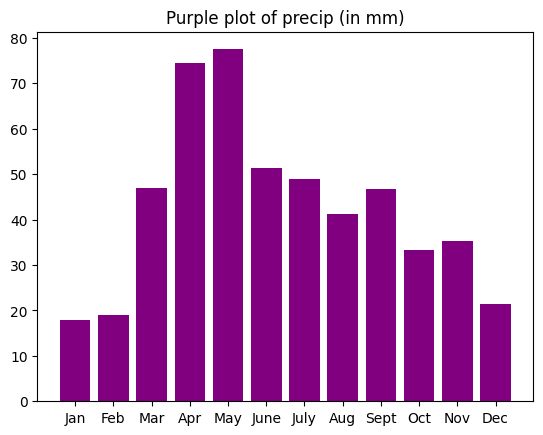

In [20]:
f, ax = plt.subplots()

ax.bar(x=avg_monthly_precip.months,
       height=avg_monthly_precip.precip,
       color="purple")

ax.set(title="Purple plot of precip (in mm)")
plt.show()

In [21]:
precip_by_season = avg_monthly_precip.groupby(["seasons"])[["precip"]].describe()
precip_by_season

precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

In [22]:

precip_by_season.columns

MultiIndex([('precip', 'count'),
            ('precip',  'mean'),
            ('precip',   'std'),
            ('precip',   'min'),
            ('precip',   '25%'),
            ('precip',   '50%'),
            ('precip',   '75%'),
            ('precip',   'max')],
           )

In [23]:
precip_by_season.columns = precip_by_season.columns.droplevel(0)
precip_by_season

,count,mean,std,min,25%,50%,75%,max
seasons,,,,,,,,
Fall,3.0,38.438667,7.257173,33.274,34.290,35.306,41.021,46.736
Spring,3.0,66.294000,16.787075,46.990,60.706,74.422,75.946,77.470
Summer,3.0,47.159333,5.329967,41.148,45.085,49.022,50.165,51.308
Winter,3.0,19.388667,1.802028,17.780,18.415,19.050,20.193,21.336


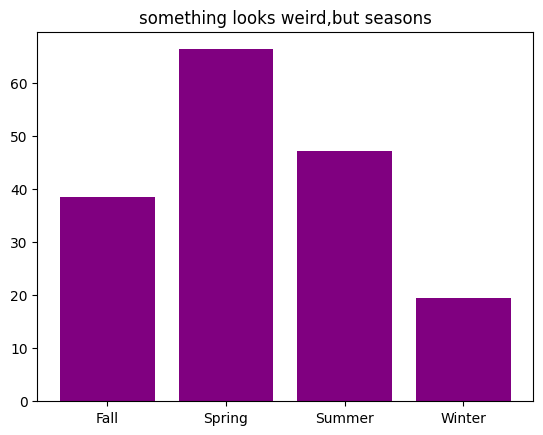

In [24]:
f, ax = plt.subplots()

ax.bar(precip_by_season.index,
        precip_by_season["mean"],
        color="purple")

ax.set(title="something looks weird,but seasons")
plt.show()

In [25]:
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"]
)[["precip"]].median()

avg_monthly_precip_median

,precip
seasons,
Fall,35.306
Spring,74.422
Summer,49.022
Winter,19.050


In [26]:
avg_monthly_precip_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Fall to Winter
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   precip  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


In [27]:
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"], as_index=False
)[["precip"]].median()

avg_monthly_precip_median

,seasons,precip
0,Fall,35.306
1,Spring,74.422
2,Summer,49.022
3,Winter,19.050


In [28]:
avg_monthly_precip_stats = avg_monthly_precip.groupby(
    ["seasons"]
)[["precip"]].describe()

In [29]:
avg_monthly_precip_stats

precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

In [30]:
avg_monthly_precip_stats.reset_index(inplace=True)
avg_monthly_precip_stats

seasons precip                                                              
           count       mean        std     min     25%     50%     75%     max
0    Fall    3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
1  Spring    3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
2  Summer    3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
3  Winter    3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336